# Notebook de Análise de Metadados

Este notebook Jupyter recupera todos os arquivos de Currículos Lattes de uma determinada pasta e realiza análise de dados para fornecer informações sobre os dados encontrados nos currículos Lattes.
A primeira linha de código importa a biblioteca LattesLab Python a ser usada pelo notebook.

In [1]:
import LattesLab as ll

Agora, o endereço da pasta contendo os currículos Lattes é passado para a variável "folder".

In [2]:
#folder = "D:\\thiag\\Documents\\INPE\\Research\\Datasets\\DoutoresEngenharias\\Eng2\\"
folder = "D:\\thiag\\Documents\\INPE\\Research\\Datasets\\PIBIC"

A função get_dataframe_from_folder cria uma matriz de dados (dataframe) a partir desses Currículos Lattes na pasta. O segundo parâmetro (True ou False) decide se esse dataframe será salvo em um arquivo csv para uso posterior.

In [3]:
metadataframe = ll.get_dataframe_from_folders(folder, True)

Antes de qualquer análise, digamos que queremos filtrar os Currículos Lattes atualizados de 1952 a junho de 2017. Então poderíamos adicionar o filtro abaixo:

In [4]:
refdate1 = '01011952'
refdate2 = '01062017'
metadataframe2 = ll.filter_by_date(metadataframe, refdate1, refdate2)

Agora, O número de Currículos Lattes que foram analisados é mostrado.

In [5]:
total1 = metadataframe.shape[0]
total1

906

E o número de Currículos Lattes depois que o filtro de data foi aplicado.

In [6]:
total2 = metadataframe2.shape[0]
total2

883

Vamos verificar, por exemplo, quantos brasileiros estão listados no dataframe.

In [7]:
country = '"BRA"'
total_bra = metadataframe.query('nacionalidade==' + country).shape[0]
total_bra

625

Também é possível verificar se algum pesquisador específico está listado no dataframe. Só é possível realizar essa análise se o nome do pesquisador que você passar for exatamente o mesmo que o do CV do Lattes. Nenhum erro de digitação!

In [8]:
name = 'Mariany Ludgero Maia Gomes'

Com o nome definido, podemos verificar se o pesquisador está localizado no dataframe (e na lista de Currículos Lattes).

In [9]:
isthere = ll.is_in_df(name, metadataframe['Nome'])
isthere

True

E, se o pesquisador ou pesquisadora for encontrado, também podemos verificar os dados associados a esse pesquisador.

In [10]:
if isthere:
    print(metadataframe.loc[lambda metadataframe: metadataframe['Nome'] == 
                            name])

                           Nome          lattesId nacionalidade atualizado  \
433  Mariany Ludgero Maia Gomes  3950347307650444           BRA   06042017   

    quantasVezesPIBIC anoPrimeiroPIBIC quantasGrad anoPrimeiraGrad quantosM  \
433                 5             2010           1            2011        1   

    anoPrimeiroM    ...     papers2008 papers2007 papers2006 papers2005  \
433         2018    ...              0          0          0          0   

    papers2004 papers2003 papers2002 papers2001 papers2000 papers1999  
433          0          0          0          0          0          0  

[1 rows x 54 columns]


De volta às nacionalidades, vamos produzir um gráfico de pizza das frequências das nacionalidades. Como o Lattes CV é uma plataforma brasileira, esperamos que os brasileiros sejam os mais numerosos neste gráfico.

<Figure size 432x288 with 0 Axes>

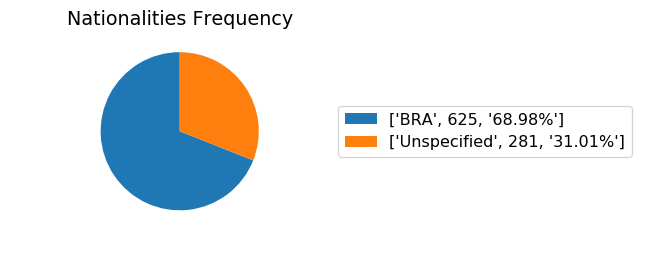

In [11]:
chartdata, fig1 = ll.get_freq_pie_chart(metadataframe.nacionalidade, "Nationalities Frequency")

E quanto ao número de bolsas de iniciação científica concedidas aos pesquisadores enquanto cursavam sua graduação?

<Figure size 768x576 with 0 Axes>

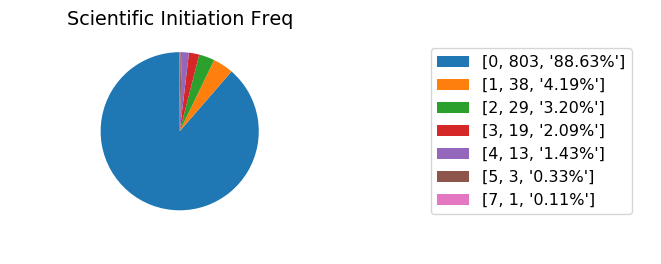

In [12]:
chartdata2, fig2 = ll.get_freq_pie_chart(metadataframe.quantasVezesPIBIC, "Scientific Initiation Freq")

Por fim, também podemos analisar a última vez que esses pesquisadores atualizaram seus Currículos Lattes (a partir de hoje).

Upper-limit date invalid. Using default date of today.


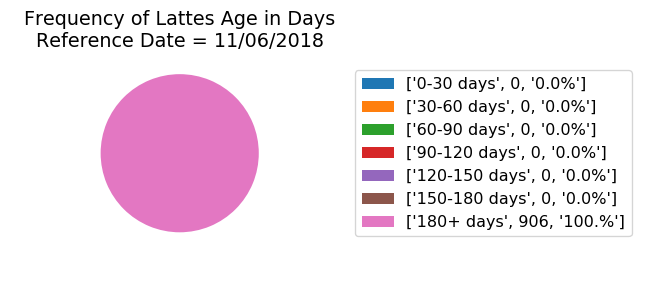

In [13]:
chartdata3, fig3 = ll.get_ctgrs_pie_chart(metadataframe.atualizado,"Frequency of Lattes Age in Days")

É possível realizar a mesma análise usando uma data limite superior, para que as idades dos Currículos Lattes sejam verificadas de acordo com a data determinada. Se houver datas mais recentes do que a passada como parâmetro, o LattesLab toma a data mais recente dos Currículos Lattes, para não eliminar nenhum arquivo da análise.

Dates more recent than date limit found. The most recent date is 12 days earlier than the selected date and will be used as reference.


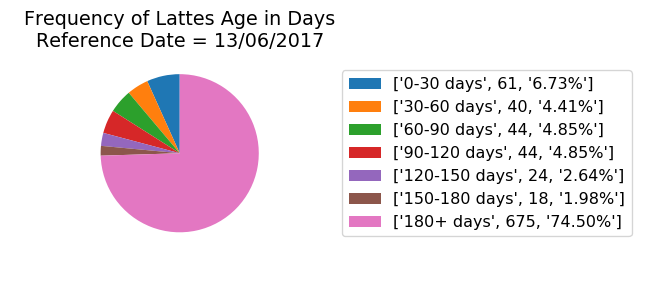

In [14]:
chartdata4, fig4 = ll.get_ctgrs_pie_chart(metadataframe.atualizado,"Frequency of Lattes Age in Days", '01062017')